## Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# pip install xgboost

## Import Dataset

In [6]:
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [7]:
df.columns = ['Id', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']

In [8]:
df.head()

,Id,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [174]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [102]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


## EDA

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [104]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df.isna().any()

Id              False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [106]:
def split(x, idx):
    try:
        return str(x).split('/')[idx]
    except:
        return 'Kosong'

# df.drop('Name', axis=1, inplace=True)
df['HomePlanet'].fillna(df['HomePlanet'].mode(), inplace=True)
df.dropna(subset=['CryoSleep'], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)

df['Cabin_1'] = df.Cabin.apply(lambda x : split(x, 0))
df['Cabin_2'] = df.Cabin.apply(lambda x : split(x, 1))
df['Cabin_3'] = df.Cabin.apply(lambda x : split(x, 2))
df.drop("Cabin", axis=1, inplace=True)

<AxesSubplot:xlabel='VRDeck'>

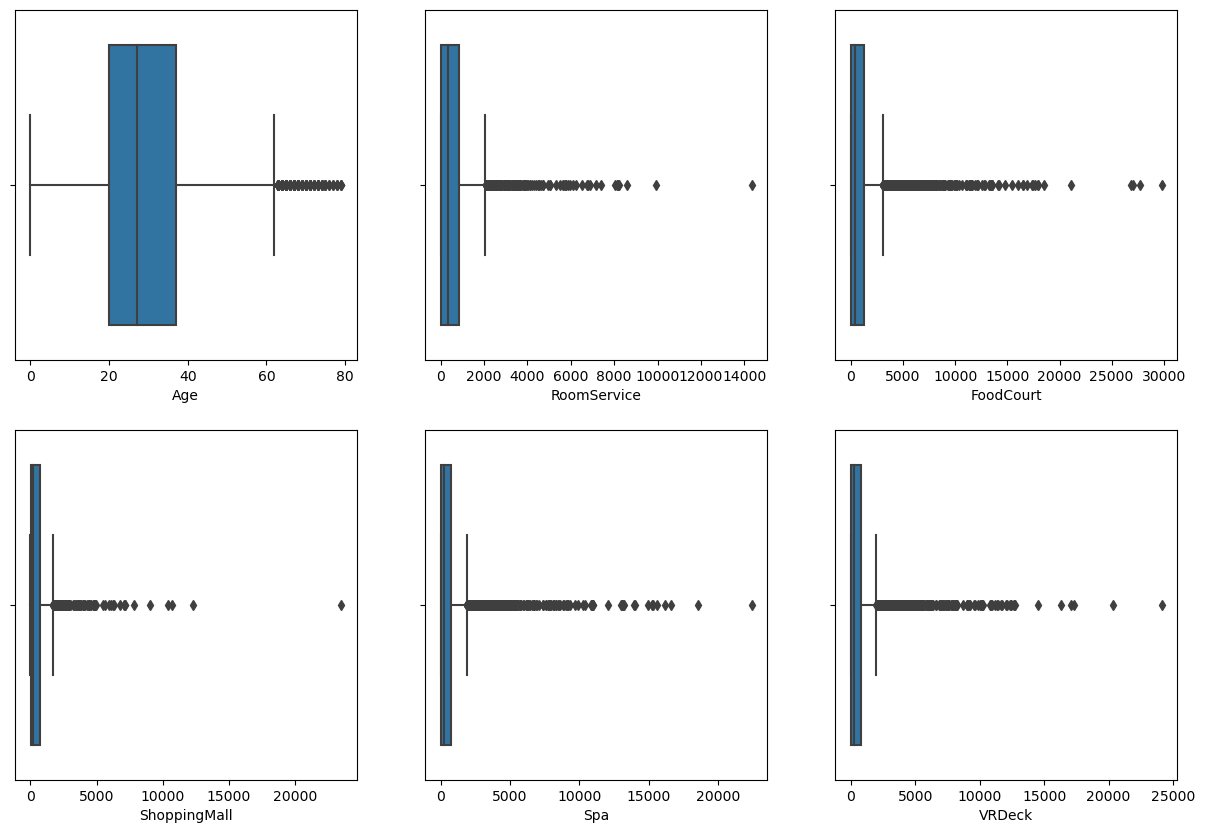

In [107]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x=df['Age'], ax=ax[0, 0])
sns.boxplot(x=df[df['RoomService'] != 0]['RoomService'], ax=ax[0, 1])
sns.boxplot(x=df[df['FoodCourt'] != 0]['FoodCourt'], ax=ax[0, 2])
sns.boxplot(x=df[df['ShoppingMall'] != 0]['ShoppingMall'], ax=ax[1, 0])
sns.boxplot(x=df[df['Spa'] != 0]['Spa'], ax=ax[1, 1])
sns.boxplot(x=df[df['VRDeck'] != 0]['VRDeck'], ax=ax[1, 2])

<AxesSubplot:xlabel='VIP', ylabel='count'>

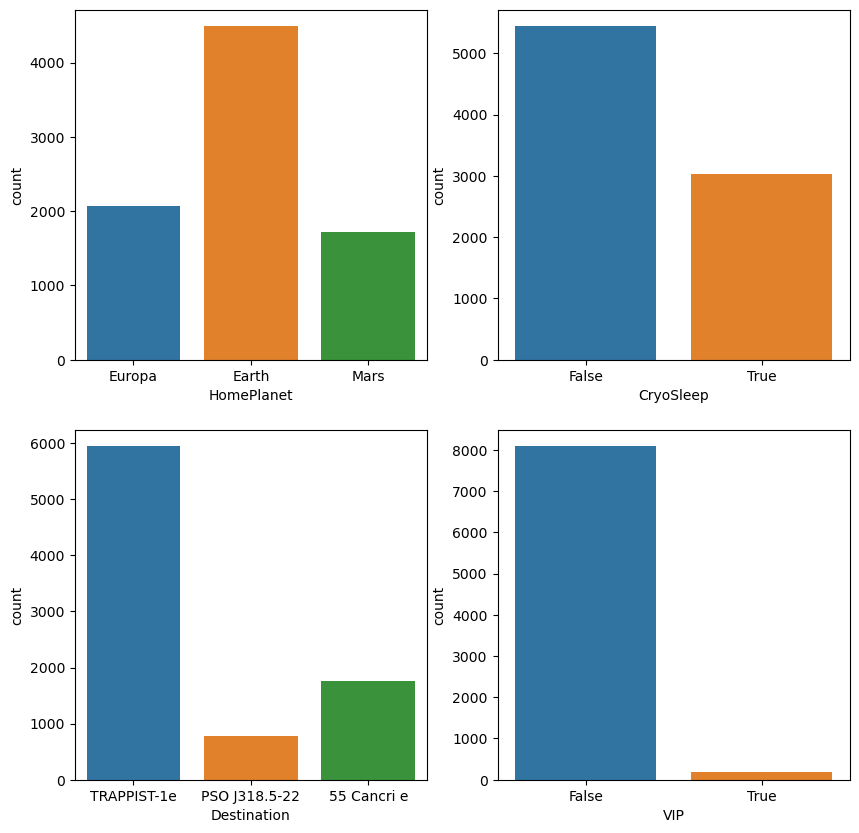

In [108]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x=df['HomePlanet'], ax=ax[0, 0])
sns.countplot(x=df['CryoSleep'], ax=ax[0, 1])
sns.countplot(x=df['Destination'], ax=ax[1, 0])
sns.countplot(x=df['VIP'], ax=ax[1, 1])

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

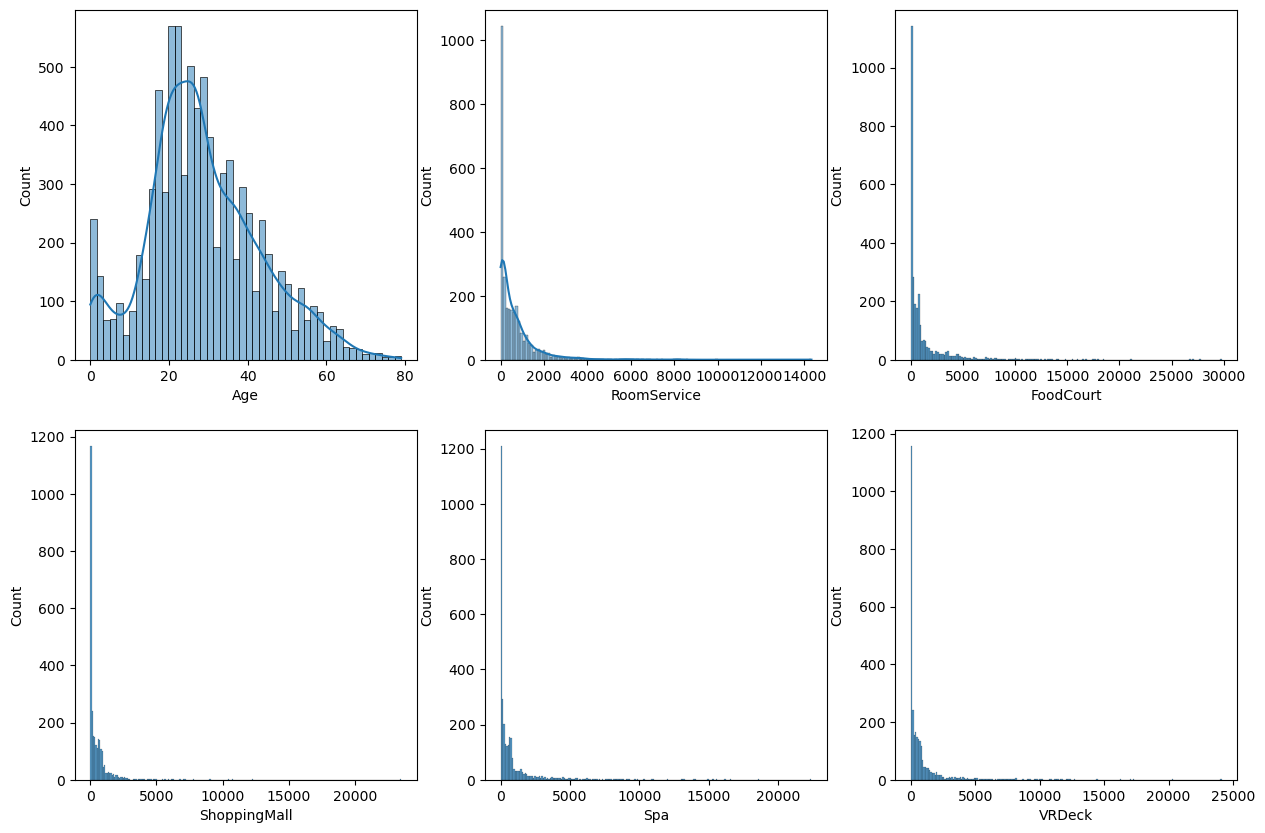

In [109]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(x=df['Age'], ax=ax[0, 0], kde=True)
sns.histplot(x=df[df['RoomService'] != 0]['RoomService'], ax=ax[0, 1], kde=True)
sns.histplot(x=df[df['FoodCourt'] != 0]['FoodCourt'], ax=ax[0, 2])
sns.histplot(x=df[df['ShoppingMall'] != 0]['ShoppingMall'], ax=ax[1, 0])
sns.histplot(x=df[df['Spa'] != 0]['Spa'], ax=ax[1, 1])
sns.histplot(x=df[df['VRDeck'] != 0]['VRDeck'], ax=ax[1, 2])

In [110]:
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for a in columns :
    df[f'{a}Log'] = df[a].apply(lambda x : np.log(x) if x != 0 else 0)

# cara Konvensional
# df['RoomServiceLog'] = df['RoomService'].apply(lambda x : np.log(x) if x != 0 else 0)

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i, col in enumerate(columns):
    print(f'Nilai ke {i} adalah {col}')

cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_1', 'Cabin_3']
for col in cat_columns:
    onehot = pd.get_dummies(df[col], prefix=f'{col}')
    df = df.join(onehot)
    df.drop(col, axis=1, inplace=True)

df['Transported'] = df['Transported'].apply(lambda x : 1 if x else 0)
df['Cabin_2'] = df['Cabin_2'].apply(lambda x : float(x) if x.isdigit() else 0)

df.drop(['Id','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1, inplace=True)

columns = ['RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog']
for col in columns :
    df[col].fillna(0, inplace=True)

Nilai ke 0 adalah RoomService
Nilai ke 1 adalah FoodCourt
Nilai ke 2 adalah ShoppingMall
Nilai ke 3 adalah Spa
Nilai ke 4 adalah VRDeck


In [111]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# columns = ['Age', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog']
# a = 0
# for i, col in enumerate(columns) :
#     if i > 2:
#         a = 1
#         i = i-3
#     sns.histplot(x=df[col], ax=ax[a, i], kde=True)

In [112]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# columns = ['Age', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog']
# a = 0
# for i, col in enumerate(columns) :
#     if i > 2:
#         a = 1
#         i = i-3
#     sns.boxplot(x=df[col], ax=ax[a, i])

In [113]:
def plotdf(df, mode='box'):
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    columns = ['Age', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog']
    a = 0
    for i, col in enumerate(columns) :
        if i > 2:
            a = 1
            i = i-3
        if mode == 'box':
            sns.boxplot(x=df[col], ax=ax[a, i])
        elif mode == 'hist':
            sns.histplot(x=df[col], ax=ax[a, i], kde=True)

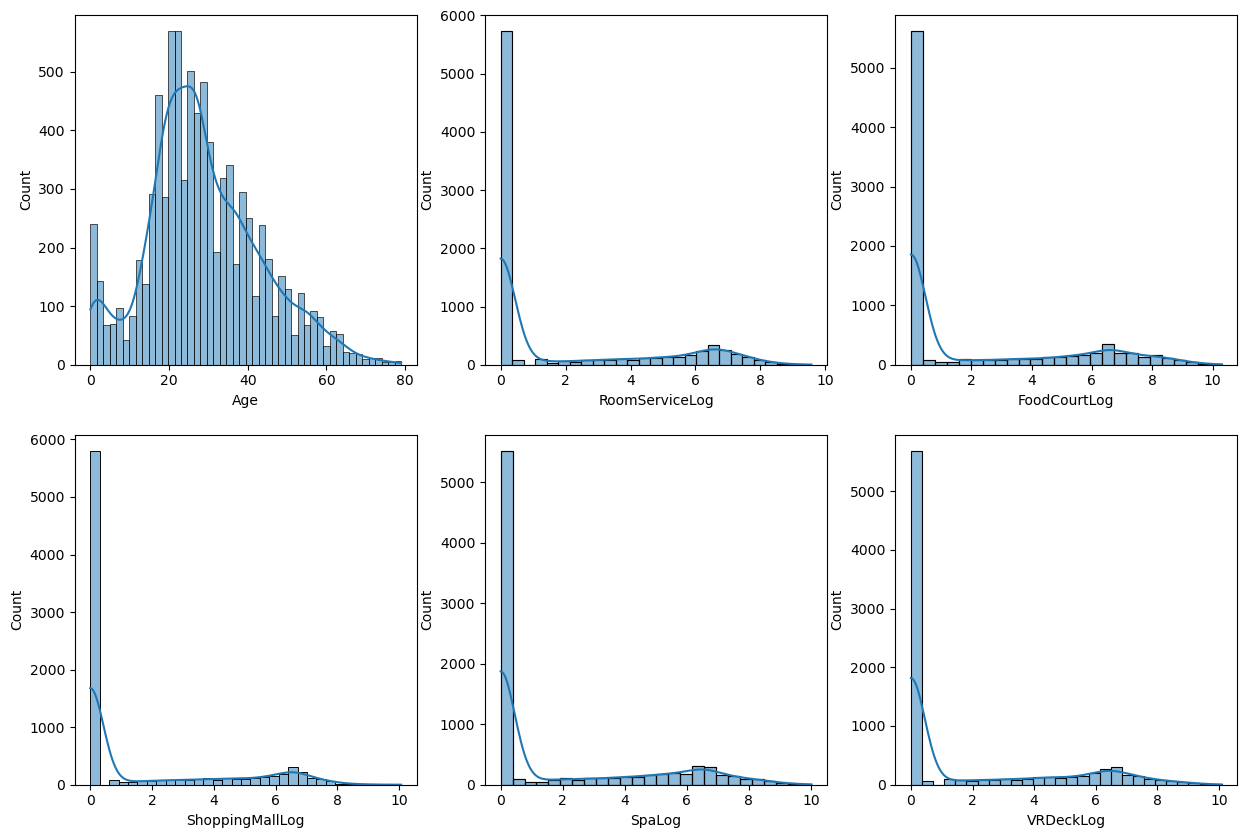

In [114]:
plotdf(df, mode='hist')

In [182]:
def split(x, idx):
    try:
        return str(x).split('/')[idx]
    except:
        return 'Kosong'
    
def preproc_test(df):
    df = df.copy()
    # df.drop('Name', axis=1, inplace=True)
    df['HomePlanet'].fillna(df['HomePlanet'].mode(), inplace=True)
    cryomode = df['CryoSleep'].mode()
    df['CryoSleep'].fillna(cryomode, inplace=True)
    df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
    df["Age"].fillna(df["Age"].median(), inplace=True)

    df['Cabin_1'] = df.Cabin.apply(lambda x : split(x, 0))
    df['Cabin_2'] = df.Cabin.apply(lambda x : split(x, 1))
    df['Cabin_3'] = df.Cabin.apply(lambda x : split(x, 2))
    df.drop("Cabin", axis=1, inplace=True)

    columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for a in columns :
        df[f'{a}Log'] = df[a].apply(lambda x : np.log(x) if x != 0 else 0)

    # cara Konvensional
    # df['RoomServiceLog'] = df['RoomService'].apply(lambda x : np.log(x) if x != 0 else 0)

    cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_1', 'Cabin_3']
    for col in cat_columns:
        onehot = pd.get_dummies(df[col], prefix=f'{col}')
        df = df.join(onehot)
        df.drop(col, axis=1, inplace=True)

    df['Cabin_2'] = df['Cabin_2'].apply(lambda x : float(x) if x.isdigit() else 0)

    df.drop(['PassengerId','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1, inplace=True)

    columns = ['RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog']
    for col in columns :
        df[col].fillna(0, inplace=True)
    
    return df

In [172]:
len(test)

4277

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8476 non-null   float64
 1   Transported                8476 non-null   int64  
 2   Cabin_2                    8476 non-null   float64
 3   RoomServiceLog             8476 non-null   float64
 4   FoodCourtLog               8476 non-null   float64
 5   ShoppingMallLog            8476 non-null   float64
 6   SpaLog                     8476 non-null   float64
 7   VRDeckLog                  8476 non-null   float64
 8   HomePlanet_Earth           8476 non-null   uint8  
 9   HomePlanet_Europa          8476 non-null   uint8  
 10  HomePlanet_Mars            8476 non-null   uint8  
 11  CryoSleep_False            8476 non-null   uint8  
 12  CryoSleep_True             8476 non-null   uint8  
 13  Destination_55 Cancri e    8476 non-null   uint8

In [136]:
df.isna().any()

Age                          False
Transported                  False
Cabin_2                      False
RoomServiceLog               False
FoodCourtLog                 False
ShoppingMallLog              False
SpaLog                       False
VRDeckLog                    False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
CryoSleep_False              False
CryoSleep_True               False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
VIP_False                    False
VIP_True                     False
Cabin_1_A                    False
Cabin_1_B                    False
Cabin_1_C                    False
Cabin_1_D                    False
Cabin_1_E                    False
Cabin_1_F                    False
Cabin_1_G                    False
Cabin_1_T                    False
Cabin_1_nan                  False
Cabin_3_Kosong               False
Cabin_3_P           

In [137]:
test.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
dtype: bool

## Data Splitting

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [185]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [187]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

D:\App\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6662735849056604

In [188]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.7959905660377359

In [189]:
catb = CatBoostClassifier()
catb.fit(X_train, y_train)

y_pred = catb.predict(X_test)

accuracy_score(y_test, y_pred)

Learning rate set to 0.023328
0:	learn: 0.6804254	total: 7.38ms	remaining: 7.38s
1:	learn: 0.6689141	total: 13.7ms	remaining: 6.85s
2:	learn: 0.6562669	total: 20.1ms	remaining: 6.66s
3:	learn: 0.6472797	total: 26.1ms	remaining: 6.51s
4:	learn: 0.6368061	total: 32.3ms	remaining: 6.43s
5:	learn: 0.6282438	total: 38.3ms	remaining: 6.35s
6:	learn: 0.6190597	total: 44.5ms	remaining: 6.31s
7:	learn: 0.6118354	total: 50.5ms	remaining: 6.26s
8:	learn: 0.6040762	total: 56.4ms	remaining: 6.21s
9:	learn: 0.5959386	total: 62.3ms	remaining: 6.17s
10:	learn: 0.5887286	total: 68.2ms	remaining: 6.13s
11:	learn: 0.5831293	total: 74.2ms	remaining: 6.11s
12:	learn: 0.5774459	total: 80ms	remaining: 6.07s
13:	learn: 0.5716553	total: 85.7ms	remaining: 6.04s
14:	learn: 0.5666606	total: 91.7ms	remaining: 6.02s
15:	learn: 0.5623763	total: 97.5ms	remaining: 5.99s
16:	learn: 0.5570201	total: 104ms	remaining: 6s
17:	learn: 0.5520031	total: 110ms	remaining: 5.98s
18:	learn: 0.5465033	total: 116ms	remaining: 5.97s


170:	learn: 0.3896245	total: 1.01s	remaining: 4.88s
171:	learn: 0.3893483	total: 1.01s	remaining: 4.88s
172:	learn: 0.3890980	total: 1.02s	remaining: 4.87s
173:	learn: 0.3887318	total: 1.02s	remaining: 4.86s
174:	learn: 0.3883814	total: 1.03s	remaining: 4.86s
175:	learn: 0.3879501	total: 1.04s	remaining: 4.85s
176:	learn: 0.3874262	total: 1.04s	remaining: 4.84s
177:	learn: 0.3869734	total: 1.05s	remaining: 4.84s
178:	learn: 0.3867093	total: 1.05s	remaining: 4.83s
179:	learn: 0.3863362	total: 1.06s	remaining: 4.82s
180:	learn: 0.3860566	total: 1.06s	remaining: 4.82s
181:	learn: 0.3858489	total: 1.07s	remaining: 4.81s
182:	learn: 0.3856698	total: 1.07s	remaining: 4.8s
183:	learn: 0.3853596	total: 1.08s	remaining: 4.79s
184:	learn: 0.3850963	total: 1.09s	remaining: 4.79s
185:	learn: 0.3849297	total: 1.09s	remaining: 4.78s
186:	learn: 0.3846455	total: 1.1s	remaining: 4.77s
187:	learn: 0.3842570	total: 1.1s	remaining: 4.76s
188:	learn: 0.3838572	total: 1.11s	remaining: 4.75s
189:	learn: 0.3

357:	learn: 0.3509354	total: 2.06s	remaining: 3.7s
358:	learn: 0.3507715	total: 2.07s	remaining: 3.69s
359:	learn: 0.3505914	total: 2.07s	remaining: 3.69s
360:	learn: 0.3503691	total: 2.08s	remaining: 3.68s
361:	learn: 0.3501712	total: 2.08s	remaining: 3.67s
362:	learn: 0.3500358	total: 2.09s	remaining: 3.67s
363:	learn: 0.3498538	total: 2.1s	remaining: 3.66s
364:	learn: 0.3497450	total: 2.1s	remaining: 3.65s
365:	learn: 0.3495747	total: 2.11s	remaining: 3.65s
366:	learn: 0.3492368	total: 2.11s	remaining: 3.64s
367:	learn: 0.3491024	total: 2.12s	remaining: 3.64s
368:	learn: 0.3490259	total: 2.12s	remaining: 3.63s
369:	learn: 0.3489360	total: 2.13s	remaining: 3.62s
370:	learn: 0.3488368	total: 2.13s	remaining: 3.62s
371:	learn: 0.3486853	total: 2.14s	remaining: 3.61s
372:	learn: 0.3485482	total: 2.15s	remaining: 3.61s
373:	learn: 0.3484591	total: 2.15s	remaining: 3.6s
374:	learn: 0.3483845	total: 2.16s	remaining: 3.59s
375:	learn: 0.3482124	total: 2.16s	remaining: 3.59s
376:	learn: 0.34

539:	learn: 0.3262818	total: 3.09s	remaining: 2.63s
540:	learn: 0.3261712	total: 3.1s	remaining: 2.63s
541:	learn: 0.3260882	total: 3.1s	remaining: 2.62s
542:	learn: 0.3259624	total: 3.11s	remaining: 2.62s
543:	learn: 0.3258155	total: 3.11s	remaining: 2.61s
544:	learn: 0.3257140	total: 3.12s	remaining: 2.6s
545:	learn: 0.3256078	total: 3.13s	remaining: 2.6s
546:	learn: 0.3255301	total: 3.13s	remaining: 2.59s
547:	learn: 0.3254126	total: 3.14s	remaining: 2.59s
548:	learn: 0.3253066	total: 3.14s	remaining: 2.58s
549:	learn: 0.3252344	total: 3.15s	remaining: 2.58s
550:	learn: 0.3251122	total: 3.15s	remaining: 2.57s
551:	learn: 0.3250062	total: 3.16s	remaining: 2.56s
552:	learn: 0.3247488	total: 3.16s	remaining: 2.56s
553:	learn: 0.3245208	total: 3.17s	remaining: 2.55s
554:	learn: 0.3244360	total: 3.17s	remaining: 2.55s
555:	learn: 0.3243203	total: 3.18s	remaining: 2.54s
556:	learn: 0.3242463	total: 3.19s	remaining: 2.54s
557:	learn: 0.3241092	total: 3.19s	remaining: 2.53s
558:	learn: 0.32

718:	learn: 0.3061140	total: 4.1s	remaining: 1.6s
719:	learn: 0.3060557	total: 4.11s	remaining: 1.6s
720:	learn: 0.3059882	total: 4.11s	remaining: 1.59s
721:	learn: 0.3058801	total: 4.12s	remaining: 1.59s
722:	learn: 0.3057345	total: 4.12s	remaining: 1.58s
723:	learn: 0.3056470	total: 4.13s	remaining: 1.57s
724:	learn: 0.3055798	total: 4.14s	remaining: 1.57s
725:	learn: 0.3054469	total: 4.14s	remaining: 1.56s
726:	learn: 0.3053618	total: 4.15s	remaining: 1.56s
727:	learn: 0.3052955	total: 4.15s	remaining: 1.55s
728:	learn: 0.3051649	total: 4.16s	remaining: 1.55s
729:	learn: 0.3050564	total: 4.17s	remaining: 1.54s
730:	learn: 0.3049242	total: 4.17s	remaining: 1.53s
731:	learn: 0.3047758	total: 4.18s	remaining: 1.53s
732:	learn: 0.3047267	total: 4.18s	remaining: 1.52s
733:	learn: 0.3045727	total: 4.19s	remaining: 1.52s
734:	learn: 0.3045040	total: 4.2s	remaining: 1.51s
735:	learn: 0.3044433	total: 4.2s	remaining: 1.51s
736:	learn: 0.3043146	total: 4.21s	remaining: 1.5s
737:	learn: 0.3041

896:	learn: 0.2888394	total: 5.13s	remaining: 589ms
897:	learn: 0.2887644	total: 5.13s	remaining: 583ms
898:	learn: 0.2886682	total: 5.14s	remaining: 577ms
899:	learn: 0.2885895	total: 5.14s	remaining: 572ms
900:	learn: 0.2885217	total: 5.15s	remaining: 566ms
901:	learn: 0.2884186	total: 5.16s	remaining: 560ms
902:	learn: 0.2883349	total: 5.16s	remaining: 555ms
903:	learn: 0.2882827	total: 5.17s	remaining: 549ms
904:	learn: 0.2881871	total: 5.18s	remaining: 543ms
905:	learn: 0.2880556	total: 5.18s	remaining: 538ms
906:	learn: 0.2879900	total: 5.19s	remaining: 532ms
907:	learn: 0.2878458	total: 5.2s	remaining: 526ms
908:	learn: 0.2877888	total: 5.2s	remaining: 521ms
909:	learn: 0.2877157	total: 5.21s	remaining: 515ms
910:	learn: 0.2875934	total: 5.22s	remaining: 510ms
911:	learn: 0.2875285	total: 5.22s	remaining: 504ms
912:	learn: 0.2874262	total: 5.23s	remaining: 498ms
913:	learn: 0.2873492	total: 5.23s	remaining: 493ms
914:	learn: 0.2872399	total: 5.24s	remaining: 487ms
915:	learn: 0.

0.7989386792452831

In [190]:
y_sub = catb.predict(test_proc)

In [191]:
sub = pd.DataFrame(test['PassengerId'])

In [193]:
sub['Transported'] = y_sub

In [196]:
sub['Transported'] = sub['Transported'].apply(lambda x : True if x == 1 else False)

In [198]:
sub.to_csv('submission.csv', index=False)